# Sales Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Gathering Basic information

In [9]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
#describe
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
#Count of rows in each column
df.count()

TV           200
Radio        200
Newspaper    200
Sales        200
dtype: int64

In [15]:
#Shape of the Dataset i.e number of rows and columns
shape = df.shape
print("Shape = ",shape)

Shape =  (200, 4)


In [17]:
#Check the null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [19]:
# MInimum value from each column
df.min()

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64

In [21]:
#Maximum value from each column
df.max()

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64

In [23]:
#Check the Duplicate values
df.duplicated().sum()

0

# Identification of outliers using Boxplot and IQR method

<Axes: >

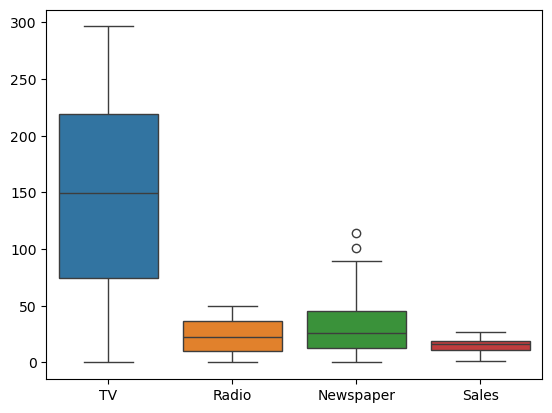

In [25]:
#boxplot of dataset 
sns.boxplot(df)

C:\Users\Chetanya Kumar\AppData\Local\Temp\ipykernel_27024\1009239529.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TV', palette = 'Blues',ax=axes[0, 0])
C:\Users\Chetanya Kumar\AppData\Local\Temp\ipykernel_27024\1009239529.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Radio',palette ='husl', ax=axes[0, 1])
C:\Users\Chetanya Kumar\AppData\Local\Temp\ipykernel_27024\1009239529.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Newspaper',palette ='deep', ax=axes[1, 0])
C:\Users\Chetanya Kumar\

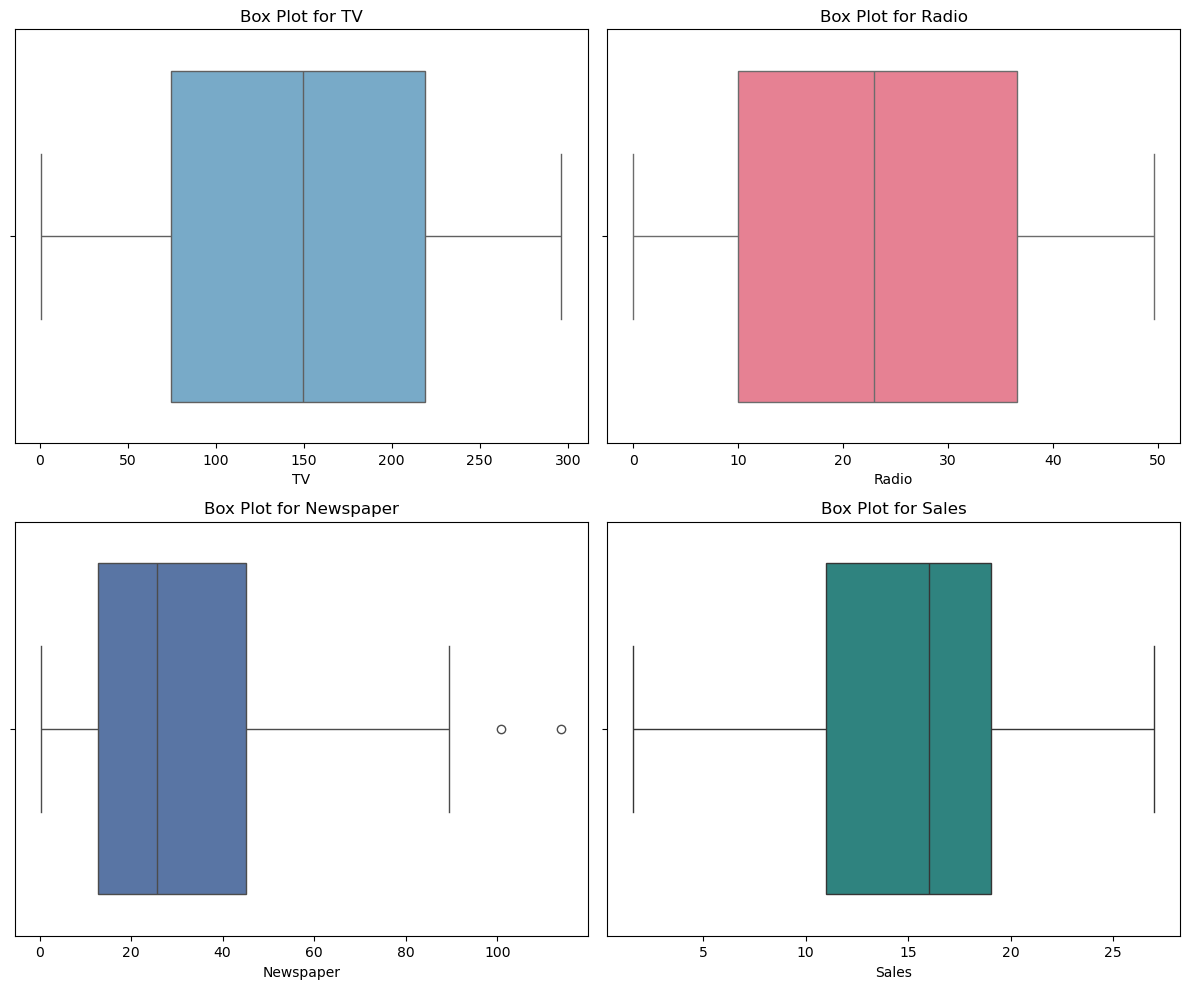

In [27]:
#Box plot for each column 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=df, x='TV', palette = 'Blues',ax=axes[0, 0])
axes[0, 0].set_title('Box Plot for TV')

sns.boxplot(data=df, x='Radio',palette ='husl', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot for Radio')

sns.boxplot(data=df, x='Newspaper',palette ='deep', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot for Newspaper')

sns.boxplot(data=df, x='Sales',palette ='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Box Plot for Sales')

plt.tight_layout()
plt.show()

In [31]:
# identifying the outliers in the column Age
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3-Q1
threshold=1.5 
admit_outliers=df[(df['Newspaper'] <Q1-threshold*IQR) | (df['Newspaper'] > Q3+ threshold*IQR)]
admit_outliers

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


<Axes: xlabel='Newspaper'>

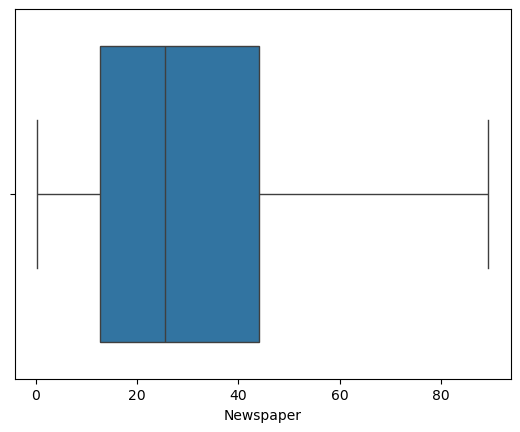

In [33]:
# Drop the outliers
df=df.drop(admit_outliers.index)
sns.boxplot(x='Newspaper',data=df)


# Data Visualization

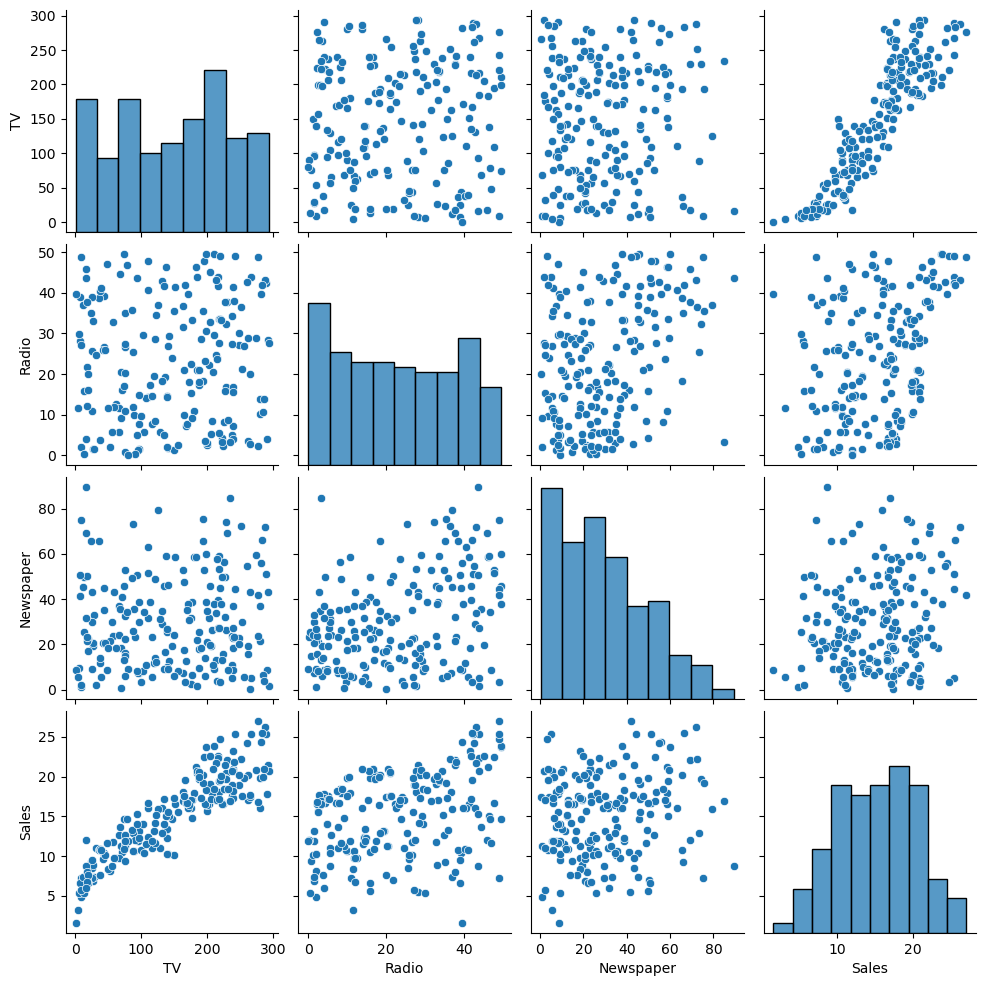

In [39]:
#Pairplot for entire data
sns.pairplot(df)

<Axes: >

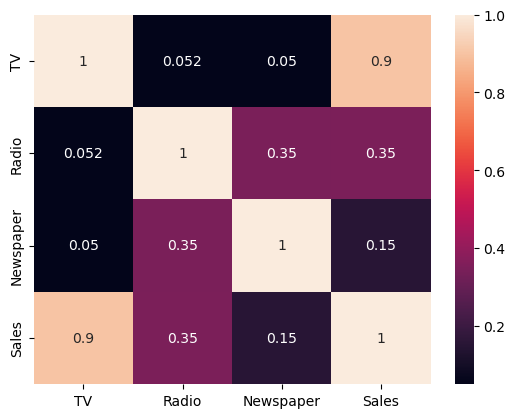

In [41]:
#Heatmap for Correlation Data 
sns.heatmap(df.corr(),annot=True)

# Splitting of x and y

In [43]:
#dividing the x and y
X = df.iloc[:,0:3]  
Y = df.iloc[:,-1]
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [47]:
Y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 198, dtype: float64

In [49]:
#dividing X_train and Y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.04, random_state=42)

In [51]:
X_train

,TV,Radio,Newspaper
19,147.3,23.9,19.1
169,284.3,10.6,6.4
160,172.5,18.1,30.7
15,195.4,47.7,52.9
56,7.3,28.1,41.4
...,...,...,...
108,13.1,0.4,25.6
14,204.1,32.9,46.0
93,250.9,36.5,72.3
181,218.5,5.4,27.4


In [53]:
y_test

66     11.0
116    12.2
17     24.4
143    10.4
158     7.3
128    24.7
142    20.1
31     11.9
Name: Sales, dtype: float64

# Regression 

In [55]:
#Transforming the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #removes the mean and scales each feature/variable to unit variance.
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)
X_test

array([[-1.35736703,  0.11162567, -1.34450276],
       [-0.09121631, -0.58231156, -0.20263852],
       [ 1.58052587,  1.12221388,  1.2710495 ],
       [-0.4979834 , -1.16171547,  0.2267805 ],
       [-1.59014126,  0.940308  ,  0.75379476],
       [ 0.86221752,  1.75551582, -1.29570514],
       [ 0.86456877,  0.69102958,  0.39757216],
       [-0.40040632, -0.37345667,  0.43173049]])

In [57]:
from sklearn.linear_model import LinearRegression #importing linear regression model
regression = LinearRegression(n_jobs = -1)

In [59]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [61]:
y_pred = regression.predict(X_test) #predicting value based on training and test

In [63]:
# accuracy calculation using r2
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.9350301004771677


In [79]:
#Predicting the result
lr = regression.predict([[230.1,37.8,69.2]]) 
lr

array([1141.62979732])